<span style="color:red;font-weight:bold">Jayant Solanki</span>,
<span style="color:red;font-weight:bold">Anant Gupta</span>
<hr/>
## <span style="float:left">Lab 2</span>
### <span style="float:right">DATA AGGREGATION , BIG DATA ANALYSIS AND VISUALIZATION</span>
<hr/>
## Video Link


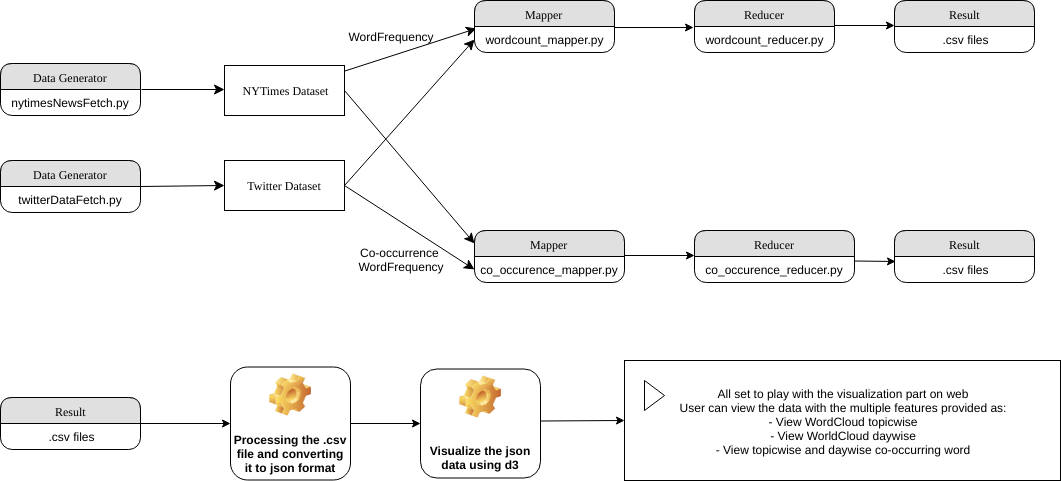

In [20]:
from IPython.display import Image
Image("img/picture.png")
#Showing the work flow of our Lab 2

In [21]:
#Background: The nytimes api doesn't returns full article body, just the snippet of it each returned
# so, I have to write the code to fetch the weburl for each article, then perfrom further requests to those url and 
#fetch the story body of each article
import requests # for performing html request to nytimes API
from datetime import datetime
from time import sleep
import lxml.html as html # for scrapping the content of the article URL of nytimes
import json

In [22]:
# Each API keys can provide 10000 response hits
topic = "trade+war"#topic to be looked for
apikey = "527c18ffc4e648cb936f582a0e264ff1"
fl = "snippet,web_url"#selective attributes of json response
pageNo = "0"#initial page is 0, articles fetched using api are grouped in 10 per page starting 0 and upto page 100
dateRange = ["20180408", "20180409"]
# dateRange = ["20180321", "20180322", "20180323", "20180324", "20180325", "20180326", "20180327", "20180328"]# can be changed t any period

In [23]:
#this function parse the json response from nytimes and create new dictionary using two attributes only
def parse_articles(articles):
    '''
    This function takes in a response to the NYT api and parses
    the articles into a list of dictionaries
    '''
    news = []
    fetch = articles['response']['docs']
    for i in range(0,len(fetch)):
        dic = {}
#         print(fetch[i])
        dic['web_url'] = fetch[i]['web_url']
        if fetch[i]['snippet'] is not None:
            dic['snippet'] = fetch[i]['snippet']
#         dic['url'] = i['web_url']
        news.append(dic)
    return(news)

In [24]:
# this function perfrom request to nytimes api using the paramters passed and returns the parseed responsed to the caller function
def get_articles(topic, begin_date, end_date, fl, apikey):
    all_articles = []#stores all articles for a particular day
    page = 0
    while(page<100):
        sleep(1)
#     for page in range(0,100): #NYT limits pages to first 100 pages starting page 0, each page has 10 articles max
        try:
            
            url = "http://api.nytimes.com/svc/search/v2/articlesearch.json?q="+topic+"&begin_date="+begin_date+"&end_date="+end_date+"&fl="+fl+"&page="+str(page)+"&api-key="+apikey
            print(url)
            requestArticles = requests.get(url)
            data = requestArticles.json()
            if len(data["response"]["docs"])>0:
                all_articles.append(parse_articles(data))
#                 print(data)
            else:# checks if further pages have no articles to show, if yes then break the loop and return the fetched articles
                print(parse_articles(data))
                break
        except:
            print("You called the api way to fast, Dude, trying again")
            print(data)
#             page = page - 1
            sleep(1)
            continue#try again
        print("Page: "+str(page))
#         break
        page=page+1
    return(all_articles)

In [25]:
#caller function
processArticles = []
for i in range(0,1):
    datetimeobject = datetime.strptime(dateRange[i],'%Y%m%d')
    beginDate = datetimeobject.strftime('%m-%d-%Y')
    datetimeobject = datetime.strptime(dateRange[i+1],'%Y%m%d')
    endDate = datetimeobject.strftime('%m-%d-%Y')
    print("Fetching articles for Data period: " + beginDate + " - "+ endDate)
    processArticles = get_articles(topic, dateRange[i], dateRange[i+1],fl, apikey)
    if(len(processArticles)>0):
#         try:
#             dataToWrite = processArticles
# #             print(dataToWrite)
#         except:
#             print(len(processArticles))
#             print(processArticles)
#             print(processArticles[0])
#             break
        with open("textcorpus/"+topic+dateRange[i]+".txt", 'w') as outfile:#used for storing snippets
            for item in processArticles:
                for articles in item:
#                     print(articles)
                    outfile.write(articles["snippet"])
                    outfile.write("\n")
        with open("textcorpus/"+topic+dateRange[i]+"-full.txt", 'w') as outfile:#used for storing full articles
            for item in processArticles:
                for articles in item:
                    fullpage = requests.get(articles["web_url"])
                    htmlbody = html.fromstring(requests.get(articles["web_url"]).content)
                    output = "".join(htmlbody.xpath('//p[contains(@class,"story-body-text")]//text()'))#scrapper
#                     print(output+"\n\n")
#                     output = output.decode('utf8').encode('latin1').decode('utf8')
                    output = str(output.encode("ascii", "ignore"))#since the body has lots of escape characters, I have to convert
    # utf-8 response into ascii using ignore flag to bypass those escape characters
                    outfile.write(output[2:-1])
                    outfile.write("\n")
    else:
        print("Insufficient data for date: "+beginDate+" to save")
#     break
# print(processArticles[0][0:-1])

Fetching articles for Data period: 04-08-2018 - 04-09-2018
http://api.nytimes.com/svc/search/v2/articlesearch.json?q=trade+war&begin_date=20180408&end_date=20180409&fl=snippet,web_url&page=0&api-key=527c18ffc4e648cb936f582a0e264ff1
Page: 0
http://api.nytimes.com/svc/search/v2/articlesearch.json?q=trade+war&begin_date=20180408&end_date=20180409&fl=snippet,web_url&page=1&api-key=527c18ffc4e648cb936f582a0e264ff1
Page: 1
http://api.nytimes.com/svc/search/v2/articlesearch.json?q=trade+war&begin_date=20180408&end_date=20180409&fl=snippet,web_url&page=2&api-key=527c18ffc4e648cb936f582a0e264ff1
Page: 2
http://api.nytimes.com/svc/search/v2/articlesearch.json?q=trade+war&begin_date=20180408&end_date=20180409&fl=snippet,web_url&page=3&api-key=527c18ffc4e648cb936f582a0e264ff1
Page: 3
http://api.nytimes.com/svc/search/v2/articlesearch.json?q=trade+war&begin_date=20180408&end_date=20180409&fl=snippet,web_url&page=4&api-key=527c18ffc4e648cb936f582a0e264ff1
Page: 4
http://api.nytimes.com/svc/search/v2

In [ ]:
# /usr/local/hadoop/bin/hadoop jar /usr/local/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.8.3.jar -input /user/jayant/input/ -output /user/jayant/output_new2 -mapper /home/jayant/wordcount_mapper.py -reducer /home/jayant/wordcount_reducer.py -numReduceTasks 1

<span style="color:red;font-weight:bold">Anant Gupta</span>, 
<span style="color:red;font-weight:bold">Jayant Solanki</span>
<hr/>
## <span style="float:left">Finding trending words from a news topic on twitter.</span>
### <span style="float:right">Using twitter API to fetch tweets for a particular search topic</span>
<hr/>

In [34]:
# Here we will collect the tweets in batches for each dates using the twitter api. There are limitations to collect
# the tweets using the twitter api. So in order to overcome with this limitation we have kept a waiting period before
# starting to fetch the tweets again
# Below are the modules which we need to import for this twitter data collection script
import tweepy
import json
import time
import re
import string
from datetime import date
from tweepy import OAuthHandler

In [35]:
#This is the main class which we will use to perform the data collection using the twitter api.
# In the init method we will give the api keys and intialize the api connection.

class TwitterDataCollecion(object):
    
    def __init__(self,query,tweetscount):
        
        #Initialize the twitter api connection
        consumer_key = 'M3uDdeL5NzbjfdBGVtL5r9PZu'
        consumer_secret = 'yF3yQnM05yuZgVSDKsaMWePs3M93f7XQh6PQHOQazyytvlMzSM'
        access_token = '417187736-o3vz5smd7Y50QIfPxVpWdKTTA645OwRRDJhfRZBU'
        access_secret = 'x7IbwZMcIgl29ee5uYbaHfOf5VUQh2e0rkbNFasTjk5Mq'
         
        auth = OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_secret)
        self.api = tweepy.API(auth)
        self.query = query
        self.tcount = tweetscount


    def search_tweet(self):
        ''' Function that takes in a search string 'query', the maximum
            number of tweets 'self.tcount'. It returns a list of 
            tweepy.models.Status objects. '''
     
        searched_tweets = []
        while len(searched_tweets) < self.tcount:
            remaining_tweets = self.tcount - len(searched_tweets)
            try:
                new_tweets = self.api.search(q=self.query, count=remaining_tweets)
                print('found',len(new_tweets),'tweets')
                if not new_tweets:
                    print('no tweets found')
                    break
                searched_tweets.extend(new_tweets)
            except tweepy.TweepError:
                print('exception raised, waiting 1 minutes')
                time.sleep(1*60)
                continue
                #Continue the tweets collection after sleeping for 1 mins
        return searched_tweets
    
    
    def clean_text_and_tokenize(self,line):        
        tokens = TweetTokenizer(strip_handles=True, reduce_len=True).tokenize(line)
        
        return tokens
       
    def clean_tweet(self,tweet):
        return " ".join(self.clean_text_and_tokenize(tweet))
    
    def write_tweets(self,tweets, filename,encoding="utf-8"):
        ''' Function that appends the cleansed tweets to a file. '''
     
        with open(filename, 'a') as f:
            for tweet in tweets:
                # t = self.clean_tweet(tweet._json["text"])
                t = tweet._json["text"]
                t = str(t.encode("ascii", "ignore"))
                # index = t.find(':')
                f.write(t[t.find(':')+2:-1])
                f.write("\n")


In [33]:
# This is the main driver function where we will give the topic and the count of the tweets we need.
# Once the data is ready it is saved in a text file with timestamp in it name.
# Here we will try with a small dataset for the trade war topic.
# Note: The data is collected in batches of 100 (restriction imposed by twitter api)

def main():
    query = "trade+war"
    print("Collecting tweets for "+ query)
    today = date.today().strftime("%d%m%y")
    maxtweets = 500
    twitterclass = TwitterDataCollecion(query,maxtweets)
    tweets=twitterclass.search_tweet()
    twitterclass.write_tweets(tweets, "textcorpus/tweetsdata"+"-"+query+"-"+today+".txt")
    print("Twitter Data is ready for further analysis")
    
if __name__ == '__main__':
    main()

found 100 tweets
found 100 tweets
found 100 tweets
found 100 tweets
found 100 tweets
Twitter Data is ready for further analysis


<hr/>
## <span style="float:left">After collecting the data from both the sources (NY Times and Twitter) we'll perform the data analysis part with the following mapper and reducer code.</span>
### <span style="float:right">Below is the mapper and reducer script for getting the word frequency</span>
<hr/>

In [10]:
#wordcount_mapper.py

#!/usr/bin/env python
# -*- coding: utf-8 -*-
#the above just indicates to use python to intepret this file

# ---------------------------------------------------------------
#This mapper code will input a line of text and output <word, 1>
# 
# ---------------------------------------------------------------
import re
import string
import sys             #a python module with system functions for this OS
from nltk.corpus import stopwords
stop_word_list = stopwords.words('english')
#  to quickly test if a word is not a stop word, use a set:
stop_word_set = set(stop_word_list)
# ------------------------------------------------------------
#  this 'for loop' will set 'line' to an input line from system 
#    standard input file
# ------------------------------------------------------------
for line in sys.stdin:  

#-----------------------------------
#sys.stdin call 'sys' to read a line from standard input, 
# note that 'line' is a string object, ie variable, and it has methods that you can apply to it,
# as in the next line
# ---------------------------------
    line = line.strip()  #strip is a method, ie function, associated
                         #  with string variable, it will strip 
                         #   the carriage return (by default)
    keys = line.split()  #split line at blanks (by default), 
                         #   and return a list of keys
    for key in keys:     #a for loop through the list of keys
        value = 1
        key=key.strip('"')
        key=key.strip('.')
        key=key.strip('“')
        key=key.strip('$')
        key=key.strip('?')
        key=key.strip(',')
        key=key.strip(')')
        key=key.strip('(')
        key=key.strip(' ')
        key   = re.sub(r'\$\w*', '', key)
        key   = re.sub(r'http?:.*$', '', key)
        key   = re.sub(r'https?:.*$', '', key)
        key   = re.sub(r'pic?.*\/\w*', '', key)
        key   = re.sub(r'[' + string.punctuation + ']+', ' ', key)  # Remove puncutations like 's
        key=str.replace(key,'\'s','')
        key=str.replace(key,'\\','')
        key=str.replace(key,'s\'','')
        if(key[:1].isdigit() or key[:1]=='$' or key[:1]=='&' or len(key)<=2 or key[:1]=='"' or key[:1]=='\'' or not key.isalpha()):
            continue
        if key.lower() not in stop_word_set:
            print('{0}\t{1}'.format(key, value) ) #the {} is replaced by 0th,1st items in format list
                            #also, note that the Hadoop default is 'tab' separates key from the value


In [12]:
#wordcount_reducer.py
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# ---------------------------------------------------------------
#This reducer code will input a line of text and 
#    output <word, total-count>
# ---------------------------------------------------------------
import sys
last_key,this_key      = None,None              #initialize these variables
running_total = 0

# -----------------------------------
# Loop thru file
#  --------------------------------
print( "{0},{1}".format("word","count")) 
for input_line in sys.stdin:
    input_line = input_line.strip()

    # --------------------------------
    # Get Next Word    # --------------------------------
    vals = input_line.split("\t", 1)  #the Hadoop default is tab separates key value
    if(len(vals)<2):
        continue
    this_key, value = input_line.split("\t", 1)  #the Hadoop default is tab separates key value
                          #the split command returns a list of strings, in this case into 2 variables
    value = int(value)           #int() will convert a string to integer (this program does no error checking)
 
    # ---------------------------------
    # Key Check part
    #    if this current key is same 
    #          as the last one Consolidate
    #    otherwise  Emit
    # ---------------------------------
    if last_key == this_key:     #check if key has changed ('==' is                                   #      logical equalilty check
        running_total += value   # add value to running total

    else:
        if last_key:             #if this key that was just read in
                                 #   is different, and the previous 
                                 #   (ie last) key is not empy,
                                 #   then output 
                                 #   the previous <key running-count>
            print( "{0},{1}".format(last_key, running_total) )
                                 # hadoop expects tab(ie '\t') 
                                 #    separation
        running_total = value    #reset values
        last_key = this_key

if last_key == this_key:
    print( "{0},{1}".format(last_key, running_total))

word,count
None,0


<hr/>
## <span style="float:left">Next we'll perform the data analysis part with the following mapper and reducer code to find the co-occurence words and its corresponding frequency </span>
<hr/>
### Please refer to the hadoop.sh and hadoop-co-occurrence.sh bash scripts for running the map-reduce scripts

In [14]:
#co_occurence_mapper.py

#!/usr/bin/env python  
# -*- coding: utf-8 -*- 
#the above just indicates to use python to intepret this file

# ---------------------------------------------------------------
#This mapper code will input a line of text and output <(word,co_occurenceword), 1>
# 
# ---------------------------------------------------------------

import sys             #a python module with system functions for this OS
import re
import string
from nltk.corpus import stopwords
stop_word_list = stopwords.words('english')
#  to quickly test if a word is not a stop word, use a set:
stop_word_set = set(stop_word_list)
# ------------------------------------------------------------
#  this 'for loop' will set 'line' to an input line from system 
#    standard input file
# ------------------------------------------------------------
for line in sys.stdin:  

#-----------------------------------
#sys.stdin call 'sys' to read a line from standard input, 
# note that 'line' is a string object, ie variable, and it has methods that you can apply to it,
# as in the next line
# ---------------------------------
    line = line.strip()  #strip is a method, ie function, associated
                         #  with string variable, it will strip 
                         #   the carriage return (by default)
    words = line.split()  #split line at blanks (by default), 
                         #   and return a list of words
    value = 1

    final_words = []
    for word in words:     #a for loop through the list of words
        word=word.strip('"')
        word=word.strip('.')
        word=word.strip('“')
        word=word.strip('$')
        word=word.strip('?')
        word=word.strip(',')
        word=word.strip(')')
        word=word.strip('(')
        word=word.strip(' ')
        word   = re.sub(r'\$\w*', '', word)
        word   = re.sub(r'http?:.*$', '', word)
        word   = re.sub(r'https?:.*$', '', word)
        word   = re.sub(r'pic?.*\/\w*', '', word)
        word   = re.sub(r'[' + string.punctuation + ']+', ' ', word)
        word=str.replace(word,'\'s','')
        word=str.replace(word,'\\','')
        word=str.replace(word,'s\'','')
        if(word[:1].isdigit() or word[:1]=='$' or word[:1]=='&' or len(word)<=2 or word[:1]=='"' or word[:1]=='\'' or not word.isalpha()):
            continue
        if word.lower() not in stop_word_set:
            final_words.append(word.lower())

    if len(final_words):
        count = len(final_words)
        for i in range(count-1):
            print('{0}\t{1}'.format(final_words[i]+'-'+final_words[i+1], value) )

In [16]:
#co-occurence_reducer.py

#!/usr/bin/env python
# -*- coding: utf-8 -*-
# ---------------------------------------------------------------
#This reducer code will input a line of text and 
#    output <(word-co-occurence_word), total-count>
# ---------------------------------------------------------------
import sys

last_key      = None              #initialize these variables
running_total = 0

# -----------------------------------
# Loop thru file
#  --------------------------------
print( "{0},{1}".format("word","count")) 
for input_line in sys.stdin:
    input_line = input_line.strip()

    # --------------------------------
    # Get Next Word    # --------------------------------
    vals = input_line.split("\t", 1)  #the Hadoop default is tab separates key value
    if(len(vals)<2):
        continue
    this_key, value = input_line.split("\t", 1)  #the Hadoop default is tab separates key value
                          #the split command returns a list of strings, in this case into 2 variables
    value = int(value)           #int() will convert a string to integer (this program does no error checking)
 
    # ---------------------------------
    # Key Check part
    #    if this current key is same 
    #          as the last one Consolidate
    #    otherwise  Emit
    # ---------------------------------
    if last_key == this_key:     #check if key has changed ('==' is                                   #      logical equalilty check
        running_total += value   # add value to running total

    else:
        if last_key:             #if this key that was just read in
                                 #   is different, and the previous 
                                 #   (ie last) key is not empy,
                                 #   then output 
                                 #   the previous <key running-count>
            print( "{0},{1}".format(last_key, running_total) )
                                 # hadoop expects tab(ie '\t') 
                                 #    separation
        running_total = value    #reset values
        last_key = this_key

if last_key == this_key:
    print( "{0},{1}".format(last_key, running_total))

word,count
None,0
